In [1]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url = 'http://cowid.netlify.com/data/full_data.csv'

df = pd.read_csv(url)
df

,date,location,new_cases,new_deaths,total_cases,total_deaths
0,2020-02-25,Afghanistan,NaN,NaN,1,NaN
1,2020-02-26,Afghanistan,0.0,NaN,1,NaN
2,2020-02-27,Afghanistan,0.0,NaN,1,NaN
3,2020-02-28,Afghanistan,0.0,NaN,1,NaN
4,2020-02-29,Afghanistan,0.0,NaN,1,NaN
...,...,...,...,...,...,...
2862,2020-03-13,World,7488.0,338.0,132758,4956.0
2863,2020-03-14,World,9761.0,433.0,142534,5392.0
2864,2020-03-15,World,10967.0,343.0,153517,5735.0
2865,2020-03-16,World,13971.0,855.0,167506,6606.0


In [3]:
df = df[df['location'].isin(['Ecuador'])] #Filtro la Informacion solo para Ecuador
df = df.loc[:,['date','total_cases']] #Selecciono las columnas de analasis
# Expresar las fechas en numero de dias desde el 01 Enero
FMT = '%Y-%m-%d'
date = df['date']
df['date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-01-01", FMT)).days)

df

,date,total_cases
681,60,1
682,61,1
683,62,6
684,63,7
685,64,7
686,65,13
687,66,14
688,67,14
689,68,15
690,69,15


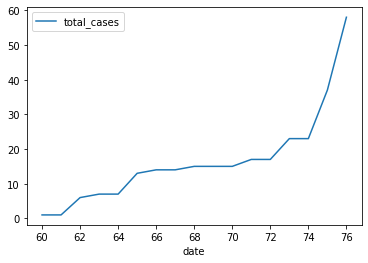

In [4]:
df.plot(x ='date', y='total_cases')

### Modelo Lineal

In [5]:
x = list(df.iloc [:, 0]) # Fecha
y = list(df.iloc [:, 1]) # Numero de casos
# Creamos el objeto de Regresión Lineal
regr = linear_model.LinearRegression()
 
# Entrenamos nuestro modelo
regr.fit(np.array(x).reshape(-1, 1) ,y)

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio

Coefficients: 
 [2.31617647]
Independent term: 
 -140.85294117647064


In [6]:
#Vamos a comprobar:
# Quiero predecir cuántos "Casos" voy a obtener por en el dia 100,
# según nuestro modelo, hacemos:
y_prediccion = regr.predict([[100]])
print(int(y_prediccion))

90


[50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97
 98 99]


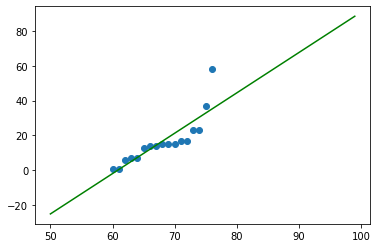

In [7]:
#Graficar
plt.scatter(x, y)
x_real = np.array(range(50, 100))
print(x_real)
plt.plot(x_real, regr.predict(x_real.reshape(-1, 1)), color='green')
plt.show()

### Modelo Logistico

In [8]:
def modelo_logistico(x,a,b):
    return a+b*np.log(x)

exp_fit = curve_fit(modelo_logistico,x,y) #Extraemos los valores de los paramatros
print(exp_fit)

(array([-637.69367899,  155.1710206 ]), array([[11872.54041469, -2814.63865054],
       [-2814.63865054,   667.4662425 ]]))


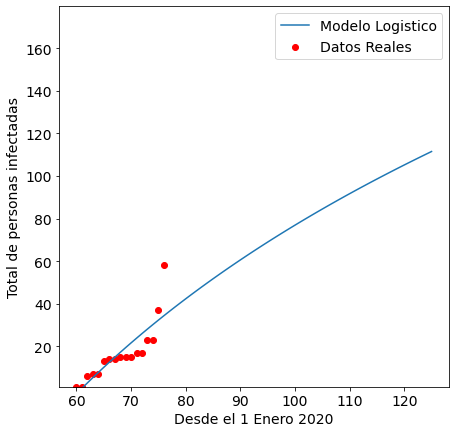

In [9]:

pred_x = list(range(min(x),max(x)+50)) # Predecir 50 dias mas
plt.rcParams['figure.figsize'] = [7, 7]
plt.rc('font', size=14)
# Real data
plt.scatter(x,y,label="Datos Reales",color="red")
# Predicted exponential curve
plt.plot(pred_x, [modelo_logistico(i,exp_fit[0][0],exp_fit[0][1]) for i in pred_x], label="Modelo Logistico" )
plt.legend()
plt.xlabel("Desde el 1 Enero 2020")
plt.ylabel("Total de personas infectadas")
plt.ylim((min(y)*0.9,max(y)*3.1)) # Definir los limites de Y
plt.show()

### Modelo Polinomial

Función Resultado
        4         3         2
0.5401 x - 8.856 x + 52.25 x - 135.3 x + 147.6


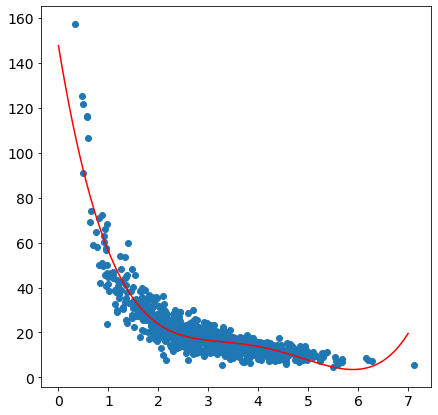

In [10]:
from pylab import *  
import numpy as np
import pandas as pd
import sympy as sp

# creamos algunas muestras aleatorias, en las que el numero de ventas de productos  
# se reduzca a medida que aumenta su precio  
np.random.seed(2)  
itemPrices = np.random.normal(3.0, 1.0, 1000)  
purchaseAmount = np.random.normal(50.0, 10.0, 1000) / itemPrices

# calculamos la curva polinomica de 4 grado que se ajusta a los datos  
# usando la funcion polyfit  
x = np.array(itemPrices)  
y = np.array(purchaseAmount)

p4 = np.poly1d(np.polyfit(x, y, 4))
print("Función Resultado")
print(p4)
# pintamos la muestra y la funcion polinomica en rojo para ver como se ajusta  
import matplotlib.pyplot as plt

xp = np.linspace(0, 7, 100)  
plt.scatter(x, y)  
plt.plot(xp, p4(xp), c='r')  
plt.show()

          4          3         2
0.007636 x - 0.2224 x + 2.013 x - 4.406 x + 4.095


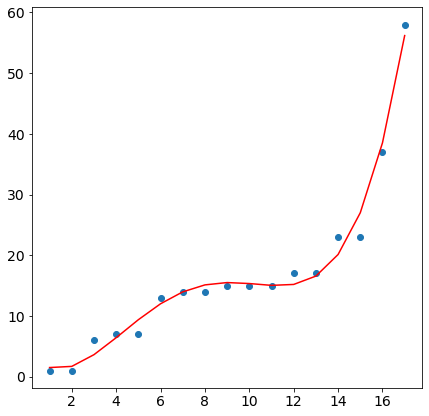

In [12]:
df = pd.read_csv(url).fillna(0) # poniendo datos nan a cero
ndf= df.loc[(df['location'] == 'Ecuador') & (df['total_cases'] != 0)] # filtrando por pais y no ceros 
ndf1=ndf[['date','total_cases','total_deaths']]
x=np.arange(1,len(ndf1)+1,1, dtype='float') # arreglo de x lo creo para simular el numero del dia y el numero de casos
y=np.array(ndf1.values[:,1], dtype='float')
y1=np.array(ndf1.values[:,2],dtype='float')

# Numero de Casos
fun1 = np.poly1d(np.polyfit(x, y, 4))
print(fun1)
plt.scatter(x, y)  
plt.plot(x, fun1(x), c='r')  
plt.show()

          4          3         2
0.007636 x - 0.2224 x + 2.013 x - 4.406 x + 4.095


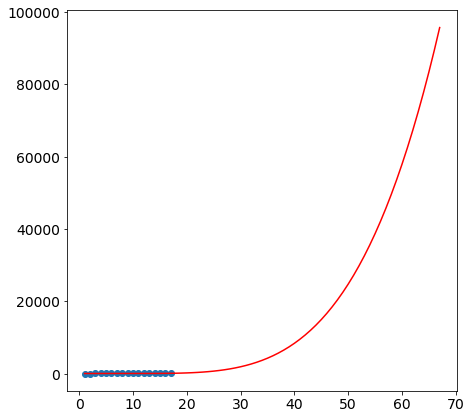

In [13]:
fun1 = np.poly1d(np.polyfit(x, y, 4))
print(fun1)
plt.scatter(x, y) 
x1=np.arange(1,len(ndf1)+51,1, dtype='float')
plt.plot(x1, fun1(x1), c='r')  
plt.show()

### Numero de Muertes

          4           3           2
0.000387 x - 0.01092 x + 0.09997 x - 0.3299 x + 0.2941


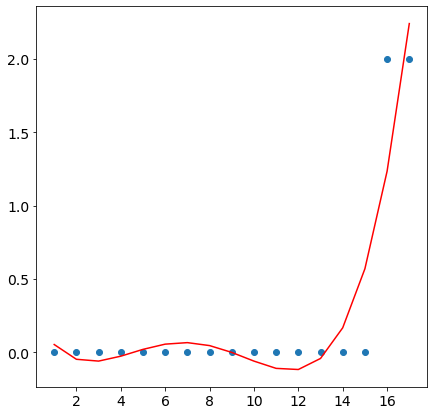

In [14]:
fun1 = np.poly1d(np.polyfit(x, y1, 4))
print(fun1)
plt.scatter(x, y1)  
plt.plot(x, fun1(x), c='r')  
plt.show()